# 응용통계학 (3주차) 3월 24일
> Bootstraping

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics, Bootstraping]

## 1. Motivation

어떠한 분포($F:cdf$)로부터 랜덤샘플 $X_1,\dots,X_n$을 뽑았다고 가정하자. 만약 우리가 어떠한 통계량의 표본분포를 알고자 한다면 그것은 원래 모집단의 분포에 의존하게 될 것이다.

예를 들어 표본평균의 평균은 모집단의 평균과 일치하고 분산은 모집단의 분산을 표본의 수로 나눈 것과 같다.

표본분포의 이해를 위해서는 모집단의 분포에 대한 정보가 필수적이나 모집단에 대한 정보는 거의 없거나 제한적인 경우가 대부분이다. 붓스트랩의 핵심적인 아이디어는 모집단의 분포함수 $F$를 그 추정량 $\hat{F}$로 대체하여 추정량의 표본분포를 찾는 것이다.

$\hat{F}$을 마치 모집단의 분포함수처럼 생각한다면, 여러 번 반복해서 샘플링을 하는 것이 가능하며, 이를 기초로 하여 표본분포를 추정하게 된다. $\hat{F}$로부터 뽑힌 표본을 붓스트랩 샘플이라고 하며 이는 $X_1,\dots,X_n$으로부터 복원추출로 $n$의 크기를 가지는 표본을 뽑는 것과 같다 ($X^{∗}_{1},\dots,X^{∗}_{n}$).

붓스트랩은 추정량의 분포 (즉, 표본분포)를 근사할 수 있는 방법으로 모집단에 대한 가정을 최소화하기 때문에 통계적 추론 과정에서 매우 폭넓게 사용될 수 있다

## 2. Applications

### 2.1 Estimation of variance

분산은 산포를 나타내는 분포의 측도이다. 분산은 그 자체로 관심대상이 되기도 하지만 신뢰구간을 구성할 때나 검정등을 수행할 때에도 추정이 필요한 중요한 값이라 할 수 있다.

추정량이 비교적 간단한 경우에는 추정량의 분산이 간단한 형태로 표현되고 또 추정될 수 있다. 예를 들어 위 예에서와 같이 표본평균의 분산은 $σ^2/n$으로 주어지고 $σ^2$은 MLE 혹은 표본분산 등에 의해 간단하게 추정할 수 있다.

이번에는 표본평균의 분산 추정을 붓스트랩을 적용하여 해결하는 과정을 간단히 기술해 보자.

먼저, 붓스트랩 샘플을 뽑는 과정을 $B$번 반복한다. 각각을 $X^{∗}_{b}=(X^{∗}_{b1},\dots,X^{∗}_{bn}), b=1,…,B$라 하고, 각 샘플에 대해서 표본평균 $\bar{X^{∗}_{b}}$를 각각 계산한다. 이들이 마치 표본평균의 표본분포에서 뽑힌 $B$개의 표본과 같은 역할을 하게 된다. 즉, 표본평균의 분산에 대한 추정량은

$$\hat{var}(\bar{X})^{*} = \frac{1}{B} \sum^{B}_{b=1} \big( \bar{X}^{*}_{b} - \frac{1}{B} \sum^{B}_{i=1} \bar{X}^{*}_{b} \big)^2$$

이 된다. 이는 $\bar{X^{∗}_{b}}$의 표본분산의 형태이며 이와 같은 방법으로 얻어지는 추정량을 붓스트랩추정량(Bootstrap estimator)라 한다.

- 표본평균의 분산에 대한 추정량 = 붓스트랩 추정량 Bootstrap estimator

> **Ex** : 모집단이 $N(5,10^2)$인 분포에서 크기 $100$인 임의표본을 추출하자. 표본평균의 분산은 어떻게 추정될 수 있는가?

- 알고 있는 사실
    - $\bar{X} ~ N(5,\frac{10^2}{100})$ $\rightarrow$ $\bar{X} ~ N(5,1^2)$
    - $var(\bar{X}) = 1$

In [51]:
n = 100
mu = 5
sigma = 10
set.seed(23)
x = rnorm(n,mu,sigma)
Est_var = var(x)/n
Est_var

[1] 0.8823097

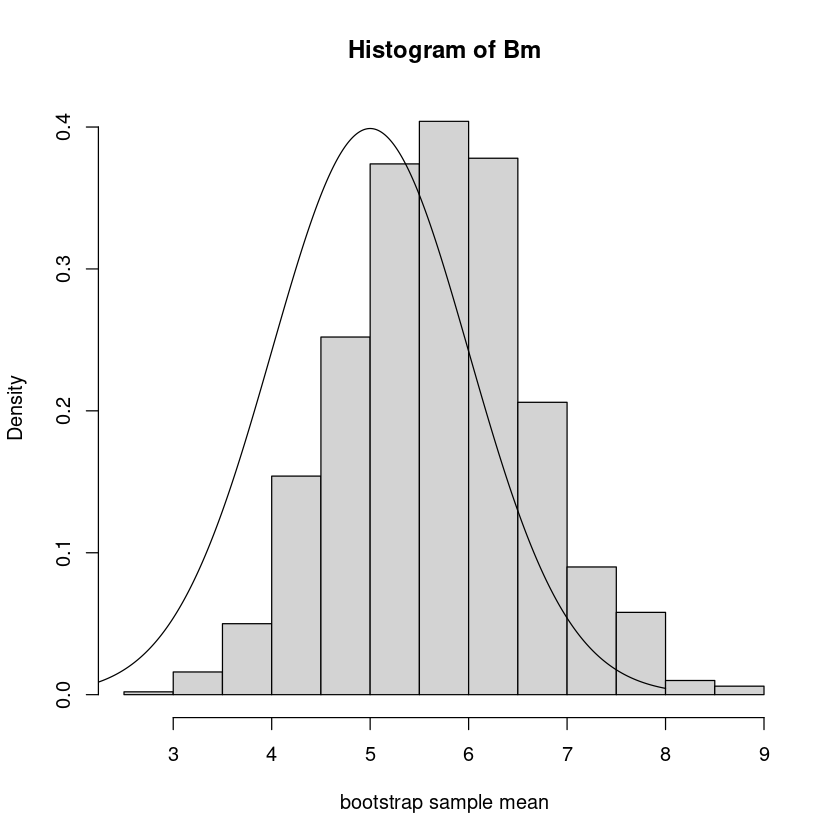

In [55]:
B=1000
BS=matrix(0,B,length(x)) # length(x) by length(x)인 0 행렬을 만드는 과정
Bm=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE) # 또 뽑을 수 있게!
  Bm[i]=mean(BS[i,]) # bootstrap으로 평균 구하는 과정
  } 
hist(Bm,xlab="bootstrap sample mean", probability = T)
g = seq(5-3,5+3,0.01)
lines(g,dnorm(g,mu,sigma/sqrt(n)))

In [56]:
mean(Bm)

[1] 5.690235

In [57]:
Est_var_B = var(Bm)
cat("estimated variance by Bootstrap: ", Est_var_B)

estimated variance by Bootstrap:  0.9042474

비교

In [5]:
cat("estimated variance by a theorerical way: " , Est_var, "\nestimated variance by Bootstrap: ", Est_var_B)

estimated variance by a theorerical way:  0.8823097 
estimated variance by Bootstrap:  0.8962641

이론적인 방법과 붓스트랩 방법의 두 결과가 비슷하다!

**Q** : 분산에 대한 두 추정치 중 이론적인 접근은 어떤 가정에 의존한 것인가? Bootstrap 방법은 어떠한가?
- $var(\bar{X}) = \frac{\sigma^2}{n}$은 독립이어야 한다.
- 하지만 Bootstraping에서는 독립이라는 최소한의 가정이 없다.

하지만, 추정량이 복잡한 경우에는 분산의 형태를 정확하게 계산하는 것이 어려울 수 있다. 그리고 계산이 가능하다 하더라도 포함하고 있는 모수들이 추정이 어렵거나 효율적 추정이 어려운 경우에는 분산의 추정에도 좋지 않은 영향을 줄 수 있다. 붓스트랩은 시뮬레이션에 기초한 방법으로 추정량이 복잡한 형태이더라도 그 적용에 전혀 문제가 없다.

예를 들어 표본중앙값($m$)의 분산에 관심이 있다고 해 보자. 대표본이론에 의하면 표본의 크기가 충분히 클 때

- 표본의 크기가 충분히 클 때 표본의 중앙값의 분산, $\cal{E}_{0.5}$는 모중앙값

$$var(m) \approx \frac{1}{4nf(\cal{E}_{0.5})^2}, f: density$$

임이 알려져 있다 ($ξ_{0.5}$는 모중앙값). 하지만 위와 같은 사실을 이끌어 내는 과정이 상대적으로 복잡하고 또한 f를 정확하게 추정하는 것이 상대적으로 쉽지 않음이 알려져 있다.

일반적으로 어떤 모수 $θ(F)$에 대한 추정량 $T(X)$의 분산은 다음과 같이 추정된다.

- 일반적인 어떤 모수 $\theta(F)$에 대한 추정량 $T(X)$의 분산, $T(X^{*}_{b})$는 $b$번째 붓스트랩 표본으로부터 계산된 추정량

$$\hat{var}(T(
X))^{*} = \frac{1}{B} \sum^{B}_{b=1} \big( T(X^{*}_{b}) - \frac{1}{B} \sum^{B}_{i=1} T(X^{*}_{b}) \big)^2$$

여기서 $T(X^{∗}_{b})$는 $b$번째 붓스트랩 표본으로부터 계산된 추정량이다.

> **Ex** : 모집단이 $N(5,10^2)$인 분포에서 크기 $100$인 임의표본을 추출하자. 표본중앙값의 분산은 어떻게 추정될 수 있는가?

In [58]:
n = 100
mu = 5
sigma = 10
set.seed(23)
x = rnorm(n,mu,sigma)
Est_var = 1/(4*n*dnorm(mu,mu,sigma)^2) # 추정치아니라서 mu도 넣고.. 현실적이지 않다.
cat("estimated variance by a theorerical way: ",Est_var)

estimated variance by a theorerical way:  1.570796

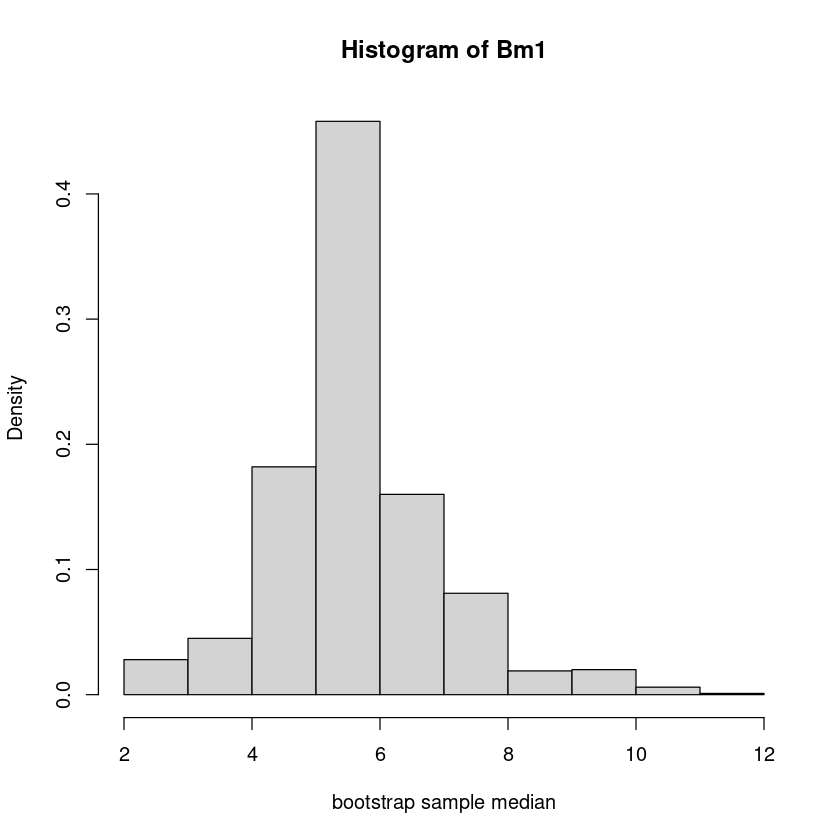

In [59]:
B=1000
BS=matrix(0,B,length(x))
Bm1=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE) # 복원추출가능~
  Bm1[i]=median(BS[i,]) # 표본 중앙값
  }
hist(Bm1,xlab="bootstrap sample median", probability = T)

In [60]:
mean(Bm1)

[1] 5.657096

In [61]:
cat("estimated variance by Bootstrap: ",var(Bm1))

estimated variance by Bootstrap:  1.709387

In [62]:
cat("estimated variance by a theorerical way: ",Est_var, "\nestimated variance by Bootstrap: ",var(Bm1))

estimated variance by a theorerical way:  1.570796 
estimated variance by Bootstrap:  1.709387

비교... 차이가 은근 있는데..?

### 2.2 Confidence interval

> Note: 붓스트랩이 가장 powerful하게 적용될 수 있는 영역이 바로 구간추정이다. 

붓스트랩이 가장 powerful하게 적용될 수 있는 영역이 바로 구간추정이다. 구간추정은 어떤 의미에서는 통계적 유의성과도 연결될 수 있는 개념이므로 통계적 추론에 활용될 수 있다. 특정 모수에 대한 신뢰구간을 간단히 구성하려면 추정량의 분산에 대한 정보가 필요할 수 있다. 예를 들어 모평균에 대한 신뢰구간은 (표본의 크기가 충분히 크다는 전제 혹은 모집단의 분포가 정규분포라는 전체 하에서)

$$\bar{X} \pm z_{\alpha/2} \sigma / \sqrt{n}$$

과 같은 형태로 주어진다. 즉, 신뢰구간을 구성하는 문제는 앞에서 언급했던 분산의 추정 문제로 귀결될 수 있다. 하지만, 이는 추정량의 (점근)분포가 정규분포일때에만 적용가능하며, 만약 그렇지 않다면 분위수에 대한 추정이 추가로 필요할 것이다. 다음은 Boottrap을 적용하여 제시할 수 있는 여러 신뢰구간에 대한 소개이다.

#### 2.2.1 Normal interval

만약 추정량의 분포가 (점근적으로) **정규분포**라고 할 수 있다면, 분산을 붓스트랩에 근거하여 추정하여

$$T(X) \pm z_{\alpha/2} \sqrt{\bar{var} (T(X)^{*})}$$

와 같은 붓스트랩 신뢰구간을 구성할 수 있다.

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($95$%)

In [63]:
barx = mean(x)
cat("by central limit theorem or normality assumption:",c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)))

by central limit theorem or normality assumption: 3.906437 7.588478

In [64]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  3.88369 7.611225

이론값하고 비슷하고, 정규분포라 할 수 있는 추정량의 분포에서 나온 신뢰구간이기 떄문에 믿을만하다.

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($90$%)

In [65]:
barx = mean(x)
cat("by central limit theorem or normality assumption:",c(barx-qnorm(0.95)*sd(x)/sqrt(n),barx+qnorm(0.95)*sd(x)/sqrt(n)))

by central limit theorem or normality assumption: 4.202424 7.292491

In [66]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.95)*sqrt(Est_var_B),barx+qnorm(0.95)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  4.183335 7.31158

90%도 비슷? 시도해보기~

#### 2.2.2 Pivotal interval

만약 추정량의 분포가 정규분포라는 가정을 하기 어렵다면, 추정량의 표본분포에 대한 정보를 그대로 이용하여 신뢰구간을 구성하여야 한다. 신뢰구간을 구성하는 기본적인 idea를 되새겨 보자. $θ(F)$에 대한 추정량을 $T(X)$라 하고 $T(X)−θ(F)$의 분포함수를 $H$라 하자. 여기서 $T(X)−θ(F)$를 피봇(pivot)이라 한다. $H$의 하위 $α$ 분위수를 $u_α$라 하면 다음과 같은 확률식을 쓸 수 있다.

$$P(u_{\alpha/2} \leq T(X) - \theta(F) \leq u_{a-\alpha/2}) = 1- \alpha$$

핵심 idea는 $u_{α/2}, u_{1−α/2}$를 붓스트랩에 근거하여 추정하는 것이다. 즉, $B$회의 샘플링에 의해 얻어진 $B$개의 추정량의 표본분위수로 위 분위수들을 추정한다. 이를 $u^{∗}_{α/2}, u^{∗}_{1−α/2}$라 하면, $θ(F)$에 대한 $100(1−α)%$ 신뢰구간은

$$( T(X) -  u^{*}_{1 - \alpha / 2}, T(X) - u^{*}_{ \alpha / 2 } )$$

가 된다.

단, 위 분위수들은 $T(X)$가 아니라 $T(X)−θ(F)$의 분포의 분위수이다. $θ(F)$는 미지의 모수이므로 실제로는 위 분위수들을 바로 얻는 것은 불가능하다. 하지만, $T(X)$의 분포의 분위수를 $v_{α/2}, v_{1−α/2}$라 하면,

$$v_{\alpha/a} = v_{\alpha/2} - \theta(F)$$

와 같은 등식이 성립한다. $v_{α/2}$는 붓스트랩에 의해 추정가능하고, $θ(F)$는 $θ(\hat{F}_{n})=T(X)$로 추정가능하므로

$$u^{*}_{\alpha/2} = v^{*}_{\alpha/2} - T(X)$$

를 얻을 수 있다. 따라서, 붓스트랩에 의한 신뢰구간은

- 추정량의 분포가 정규분포라는 가정을 하기 어려울떄

$$(2\bar{\theta} - v^{*}_{1-\alpha /2}, 2 \bar{\theta} - v^{*}_{\alpha /2} )$$

와 같이 주어진다.

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($95$%)

In [68]:
# by Bootstrap (pivotal interval)
c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025))

97.5%     2.5% 
3.852881 7.585345

#### 2.2.3 Percentile interval

Pivotal interval보다 더욱 간단한 형태로 주어지는 신뢰구간이다.

- 간단하지만 pivotal에 비해 정확도가 떨어진다.

$$(v^{*}_{\alpha /2}, v^{*}_{1 - \alpha /2} )$$

이 신뢰구간은 $ϕ(T(X))−ϕ(θ(F))$가 0을 중심으로 대칭인 분포가 되는 적절한 변환함수 $ϕ$가 존재하는 경우에만 정당화될 수 있는 것으로 알려져 있다. 즉, 편의추정량에 대해서는 좋은 신뢰구간을 제시할 수 없을 것이다.

> **Ex** : 모평균에 대한 붓스트랩 신뢰구간 ($95$%)

In [69]:
# by Bootstrap (percentile interval)
c(quantile(Bm,0.025),quantile(Bm,0.975))

2.5%    97.5% 
3.909570 7.642034

4개의 CI가 비슷하다. 간단해서 그런 것일수도?

In [73]:
cat("by central limit theorem or normality assumption:",c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)),
    "\nby Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)),
    "\nby Bootstrap (pivotal interval): ",c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025)),
    "\nby Bootstrap (percentile interval): ",c(quantile(Bm,0.025),quantile(Bm,0.975)))

by central limit theorem or normality assumption: 3.906437 7.588478 
by Bootstrap (normal interval):  3.88369 7.611225 
by Bootstrap (pivotal interval):  3.852881 7.585345 
by Bootstrap (percentile interval):  3.90957 7.642034

#### 2.2.4 추정량의 분포를 정규분포로 볼 수 없는 경우

추정량의 분포가 (근사적으로) 정규분포라면 위에서 소개한 세 종류의 붓스트랩 신뢰구간은 대략 비슷한 결과를 줄 가능성이 크다. 또한, 이론적인 접근이 가능하다면 이를 이용한 신뢰구간 또한 유사한 결과를 줄 것이다.

하지만, 추정량의 분포가 정규분포가 아니라면? (언제 이런 일이 발생하겠는가?) 정규분포에 근거한 normal inverval의 신뢰성은 크게 저하될 것이다. (추정량의 형태에 따라서 조금 다를 수 있겠지만) 나머지 두 종류의 신뢰구간은 비슷한 결과를 주는 경우가 많다.

> **Ex** : 모집단이 $χ^2(5)$인 분포에서 크기 $100, 10$인 임의표본을 각각 추출하자. 모평균에 대한 $95$% 신뢰구간을 구성하여 보자.

- 내가 아는 거
    - 크기 100 -> 정규분포 근사
    - 크기 10 -> 정규분포 근사 불가능(중심극한정리 적용 안 돼)

크기가 100일 경우

In [74]:
n = 100
df = 2
set.seed(23)
x = rchisq(n,df)
Est_var = var(x)/n
cat("estimated variance by a theorerical way: ",Est_var)

estimated variance by a theorerical way:  0.04477357

In [75]:
B=1000
BS=matrix(0,B,length(x))
Bm=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE)
  Bm[i]=mean(BS[i,])
  }
Est_var_B = var(Bm)     
cat("estimated variance by Bootstrap: ",Est_var_B)

estimated variance by Bootstrap:  0.04454241

In [76]:
barx = mean(x)
cat("by central limit theorem or normality assumption: ", c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)))

by central limit theorem or normality assumption:  1.843648 2.673095

In [77]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  1.84472 2.672023

In [78]:
cat("by Bootstrap (pivotal interval):")
c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025))

by Bootstrap (pivotal interval):

97.5%     2.5% 
1.809458 2.647588

In [79]:
cat("by Bootstrap (percentile interval)")
c(quantile(Bm,0.025),quantile(Bm,0.975))

by Bootstrap (percentile interval)

2.5%    97.5% 
1.869155 2.707284

크기가 10일 경우

In [81]:
n = 10
df = 2
set.seed(23)
x = rchisq(n,df)
Est_var = var(x)/n
cat("estimated variance by a theorerical way: ",Est_var)

estimated variance by a theorerical way:  0.2240771

In [82]:
B=1000
BS=matrix(0,B,length(x))
Bm=c()
for (i in 1:B)
  {
  BS[i,]=sample(x,replace=TRUE)
  Bm[i]=mean(BS[i,])
  }
Est_var_B = var(Bm)    
cat("estimated variance by Bootstrap: ",Est_var_B)

estimated variance by Bootstrap:  0.1869577

In [83]:
barx = mean(x)
cat("by normality assumption: ",c(barx-qnorm(0.975)*sd(x)/sqrt(n),barx+qnorm(0.975)*sd(x)/sqrt(n)))

by normality assumption:  0.5895974 2.445165

In [84]:
cat("by Bootstrap (normal interval): ",c(barx-qnorm(0.975)*sqrt(Est_var_B),barx+qnorm(0.975)*sqrt(Est_var_B)))

by Bootstrap (normal interval):  0.6699202 2.364842

In [85]:
cat("by Bootstrap (pivotal interval): ",c(2*barx-quantile(Bm,0.975),2*barx-quantile(Bm,0.025)))

by Bootstrap (pivotal interval):  0.6658902 2.311604

In [86]:
cat("by Bootstrap (percentile interval): ",c(quantile(Bm,0.025),quantile(Bm,0.975)))

by Bootstrap (percentile interval):  0.7231587 2.368872

$\therefore$ 정규가정 분포 아닌데 정규분포 이용해 CI 구하면 신뢰도가 떨어진다.

## 3. Bootstrap in regression

### 3.1 Bootstrap sampling

회귀모형 하에서 붓스트랩 샘플을 생성하는 데에는 몇 가지 방법이 있다. 이는 design이 fixed인지 random인지에 따라서 결정할 수도 있고 모형의 가정을 고려하여 결정할 수도 있다.

#### 3.1.1 Bootstrapping the residuals

- 적합된 회귀모형에 의해 생성되는 잔차를 이용하여 붓스트랩 샘플을 생성하는 접근 법으로 fixed design일때, 오차항들의 성질이 동일할 때 자연스럽게 적용할 수 있는 방법이다.
- 상대적으로 절차가 복잡하나 회귀모형의 형태를 이용한 방법으로 적절한 조건 하에서 정확하고 안정적인 결과를 기대할 수 있다.
- 오차항에 대한 특정 분포가정이 성립할 때는 모수적 붓스트랩 등을 함께 고려할 수도 있다.
자
세한 절차는 본 강의에서는 다루지 않기로 한다.

#### 3.1.2 Bootstrapping the pairs

회귀모형은 다음과 같이 설명변수와 반응변수의 순서쌍을 관측했다고 보통 가정하게 된다.

$$(x_1, y_1), \dots , (x_n, y_n)$$

따라서, $n$개의 순서쌍으로부터 복원추출을 통해 크기 $n$의 표본을 재추출하면 이것을 붓스트랩 표본으로 간주할 수 있다. 이러한 과정을 $B$번 반복하여 $B$개의 붓스트랩 표본을 생성하고 이로부터 원하는 통계량의 분포를 근사할 수 있다.

- 이 방법은 모형의 형태에 의존하지 않는다.
- 오차항에 대한 가정으로부터도 상대적으로 자유롭다.
- 위와 같은 이유로 비교적 강건한(robust)한 결과를 기대할 수 있다.
- random design 하에서는 본 방식을 적용하는 것이 자연스러우나 설명변수의 값이 주어졌다고 생각하면 residual을 이용한 방식의 적용도 가능하다.

### 3.2 Bootstarp in simple linear regression models

> **Ex** : 모든 가정이 잘 충족되는 경우

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} N(0,1)$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

학습할떄나 이렇게 많이 돌리지.. 실제로는 안 해..

In [90]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
#ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
# ep=matrix(rcauchy(n*M),M,n)
ep=matrix(rnorm(n*M),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),
    "\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),
    "\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),
    "\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  5.114787 
Bootstrap C.I. (Pivotal interval):  6.473361 
Bootstrap C.I. (Percentile interval):  5.008469 
theoretical C.I. (normal interval):  4.583317

pivotal의 C.I가 가장 95%에 근접하다 $\rightarrow$ 하지만 높다고 무조건 좋은 게 아냐. 

In [91]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.934 
Bootstrap C.I. (Pivotal interval):  0.964 
Bootstrap C.I. (Percentile interval):  0.921 
theoretical C.I. (normal interval):  0.924

> **Ex** : 정규성 가정의 위배 (소표본)

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} \Gamma(2,\sqrt{1/2})$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

정규성 가정한 거랑 이론값이랑 차이 있을걸?

In [30]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
#ep=matrix(rnorm(n*M),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  5.116709 
Bootstrap C.I. (Pivotal interval):  6.362796 
Bootstrap C.I. (Percentile interval):  4.928345 
theoretical C.I. (normal interval):  4.515607

pivotal이 가장 95%에 근접하네~

Normal 가정보다 이론이 더 안좋네? $\rightarrow$ 이 말은 즉슨, 위험할 수 있으니, 마음대로 정규성 가정은 금지

In [31]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.932 
Bootstrap C.I. (Pivotal interval):  0.947 
Bootstrap C.I. (Percentile interval):  0.904 
theoretical C.I. (normal interval):  0.907

> **Ex** : 정규성 가정의 위배 (대표본)

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} \Gamma(2,\sqrt{1/2})$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

$\epsilon$ 이 정규성 가정을 따르지 않더라도 $\hat{\beta}$의 n이 충분히 크면 정규성 가정 가능하지 $\rightarrow$ 중심극한정리

In [92]:
B=2000;M=1000
set.seed(1)
n=50

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
#ep=matrix(rnorm(n*M),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  1.908465 
Bootstrap C.I. (Pivotal interval):  1.878544 
Bootstrap C.I. (Percentile interval):  1.906769 
theoretical C.I. (normal interval):  1.932041

표본이 어느정도 확보되면(30이상) 정규성 가정 위배하더라도 정규성 가정 가능

Noramal 이랑 이론 좋네

In [93]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.952 
Bootstrap C.I. (Pivotal interval):  0.982 
Bootstrap C.I. (Percentile interval):  0.949 
theoretical C.I. (normal interval):  0.953

> **Ex** : 등분산 가정의 위배

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} N(0,(x_i - 10)^2)$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

분산 바꿔서 시도해보기(등분산 위배)

- Normal 은 괜찮을 수도
- 이론은 등분산 깨지면 영향을 많이 받을 걸

In [100]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep=matrix(rgamma(n*M,shape=2,scale=sqrt(1/2))-sqrt(2),M,n)
#ep=matrix(rnorm(n*M),M,n)
y=2+x+ep*abs(x-10)
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  48.62961 
Bootstrap C.I. (Pivotal interval):  68.74807 
Bootstrap C.I. (Percentile interval):  46.84358 
theoretical C.I. (normal interval):  42.92363

pivotal 좋아

percent 별로

이론 별로

In [101]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0))))

Bootstrap C.I. (normal interval):  0.934 
Bootstrap C.I. (Pivotal interval):  0.946 
Bootstrap C.I. (Percentile interval):  0.902 
theoretical C.I. (normal interval):  0.908

> **Ex** : 독립성 가정의 위배

- $y_i = 2 + x_i + \epsilon_i$
- $X_i \sim^{iid} U(0,1)$
- $\epsilon_i \sim^{iid} AR(0.8)$
- 붓스트랩 샘플수 2000, 95% 신뢰구간 구성 1000번 반복
- 1000개의 신뢰구간 중 실제 모수를 포함하는 비율 계산

$\epsilon_i \sim^{iid} AR(0.8)$ 은?
- $X_{i+1} = 0.8X_i + \delta_i$
    - $\delta_i \sim^\text{ iid  } N(0.1) $
- 시간 개념이 추가될 때 독립성 위배

In [102]:
B=2000;M=1000
set.seed(1)
n=10

x=matrix(runif(n*M),M,n)
c22=1/rowSums((x-rowMeans(x))^2)
ep = matrix(arima.sim(model = list(ar = 0.8), n = M*n),M,n)
y=2+x+ep
sxx=rowSums(x^2)-n*rowMeans(x)^2
sxy=rowSums(x*y)-n*rowMeans(x)*rowMeans(y)
hb=cbind(rowMeans(y)-(sxy/sxx)*rowMeans(x),sxy/sxx)
e=y-hb[,1]-x*hb[,2]
hsigma=sqrt(rowSums(e^2)/(n-2))
c22=1/rowSums((x-rowMeans(x))^2)
Bm0=Bm1=matrix(0,M,B)


for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=x[,hi]
  hy=y[,hi]
  sxxb=rowSums(hx*hx)-n*rowMeans(hx)*rowMeans(hx)
  sxyb=rowSums(hx*hy)-n*rowMeans(hx)*rowMeans(hy)
  hbb=cbind(rowMeans(hy)-(sxyb/sxxb)*rowMeans(hx),sxyb/sxxb)
  Bm0[,i]=hbb[,1] 
  Bm1[,i]=hbb[,2] 
}
# Bootstrap C.I. (normal interval)
BN=cbind(hb[,2]-qnorm(0.975)*apply(Bm1,1,sd),hb[,2]+qnorm(0.975)*apply(Bm1,1,sd))
# Bootstrap C.I. (Pivotal interval)
BP=cbind(2*hb[,2]-apply(Bm1,1,quantile,probs=0.975),2*hb[,2]-qnorm(0.975)*apply(Bm1,1,quantile,probs=0.025))
# Bootstrap C.I. (Percentile interval)
BPer=cbind(apply(Bm1,1,quantile,probs=0.025),apply(Bm1,1,quantile,probs=0.975))
# theoretical C.I. (normal interval)
AN=cbind(hb[,2]-qnorm(0.975)*sqrt(hsigma^2/sxx),hb[,2]+qnorm(0.975)*sqrt(hsigma^2/sxx))  # average lengths of intervals
cat("Bootstrap C.I. (normal interval): ",c(diff(colMeans(BN))),"\nBootstrap C.I. (Pivotal interval): ",c(diff(colMeans(BP))),"\nBootstrap C.I. (Percentile interval): ",c(diff(colMeans(BPer))),"\ntheoretical C.I. (normal interval): ", c(diff(colMeans(AN))))

Bootstrap C.I. (normal interval):  8.501556 
Bootstrap C.I. (Pivotal interval):  11.1337 
Bootstrap C.I. (Percentile interval):  8.132749 
theoretical C.I. (normal interval):  7.451194

pivotal 이 가장 좋네

In [103]:
# coverage proportions
cat("Bootstrap C.I. (normal interval): ",c(mean(apply(BN-1,1,prod)<0)),"\nBootstrap C.I. (Pivotal interval): ",c(mean(apply(BP-1,1,prod)<0)),"\nBootstrap C.I. (Percentile interval): ",c(mean(apply(BPer-1,1,prod)<0)),"\ntheoretical C.I. (normal interval): ",c(mean(apply(AN-1,1,prod)<0)))

Bootstrap C.I. (normal interval):  0.934 
Bootstrap C.I. (Pivotal interval):  0.96 
Bootstrap C.I. (Percentile interval):  0.927 
theoretical C.I. (normal interval):  0.927

**Bootstrap**
- $\beta_1$에 대한 C.I.
- $H_0$: $\beta_1 = 0$ vs $H_1$ : $\beta_1 \neq 0$
    - 여기서 가정이 깨지지 않는다는 조건 하에 계산 가능
    - p-value, 유의확률 (bootstrap 뽑기도 가능)
    - *C.I.가 0을 포함하냐?!*

$X_1, \dots , X_n$이 있을 때 $H_0$ : $\mu = \mu_0$ vs $H_1$ : $\mu \neq \mu_0$
- $\big| \frac{\bar{X} - \mu_0}{s/\sqrt{n}} > Z_{\alpha/2} \big|$
    - *p-value<$\alpha$*
        - 유의수준 $\alpha$에서 유의미하다
        - $\therefore \mu \neq \mu_0$
- $\mu$에 대한 C.I. $\bar{X} \pm Z_{\alpha/2} \frac{s}{\sqrt{n}} \ni \mu_0\text{? or not? }$
    - $\mu_0$ 가 속하는지 C.I.로 알 수 있거나 p-value 유의미성에 따라 알 수 있기도 하다

검정을 하고 싶을때
1. p-value로 검정
2. C.I. 구성 후 통계적 추론

p-value 구하는 게 어렵고, C.I 구하기 쉽다면 C.I.로 검정 결과 내세우는 것도 나쁘지 않다.(간단하니..)
- *그렇다고 완전히 결과가 일치하진 않는다.*

ex) 95% C.I.가 $(0.1,0.8)$ 일때 0을 포함하지 않으니까 $\beta_1$은 0이 아니다.

## 4. Exercise

$Sales = \hat{\beta}_0 + \hat{\beta}_1 facebook + \epsilon$

1. $Sales(\hat{y})$가 커질수록 residual이 커진다. $\rightarrow$ 등분산성 위배
2. 직선과 일치하지 않는다. $\rightarrow$ 정규성 위배(선형성 위배 될 수도 있지)

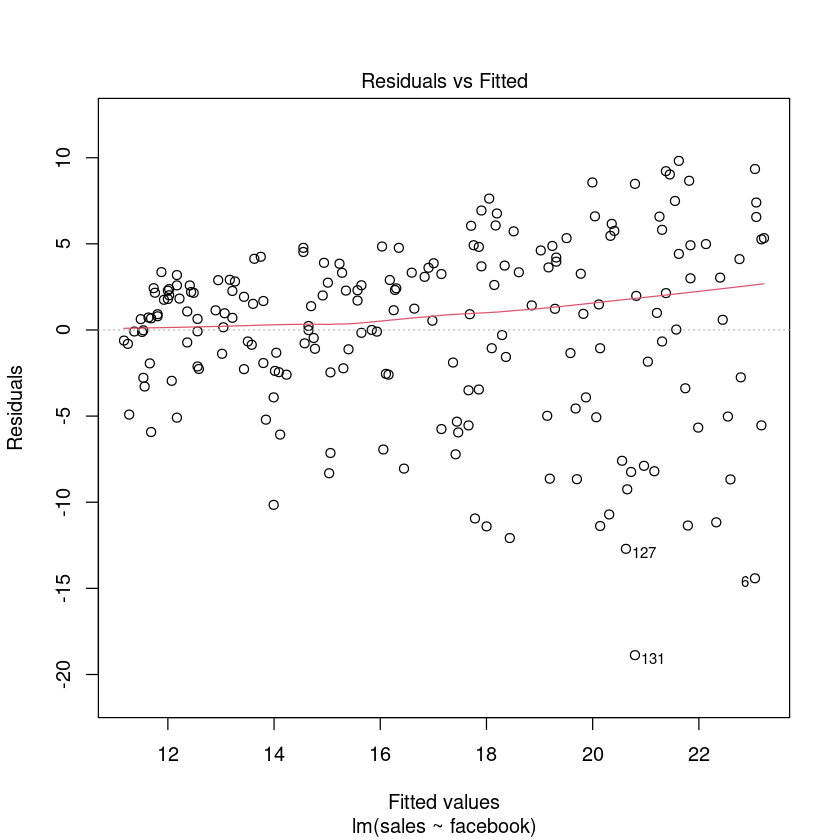

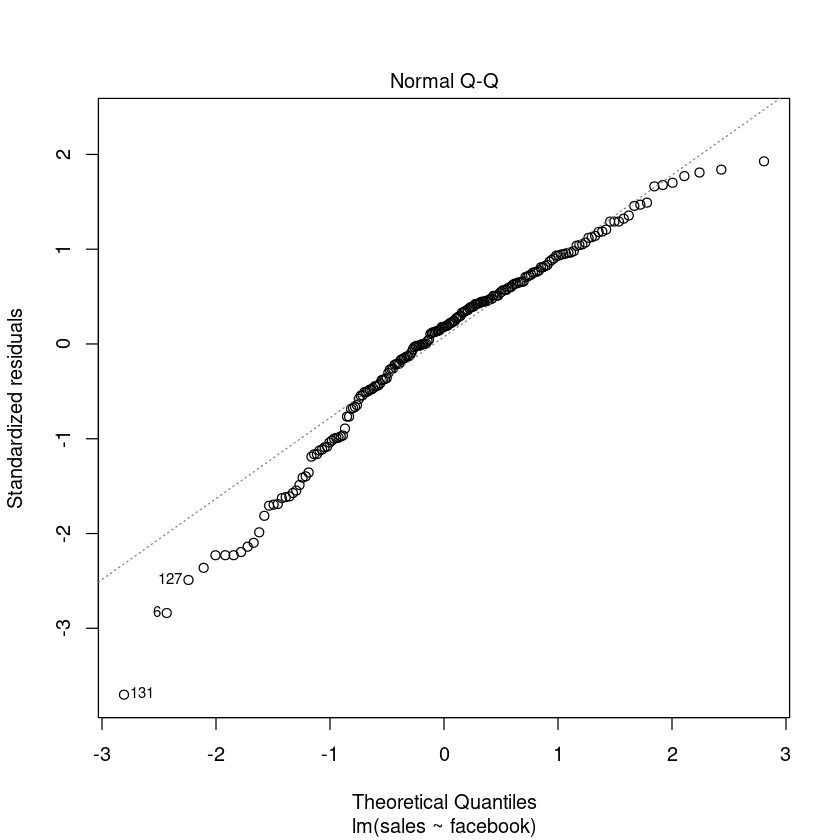

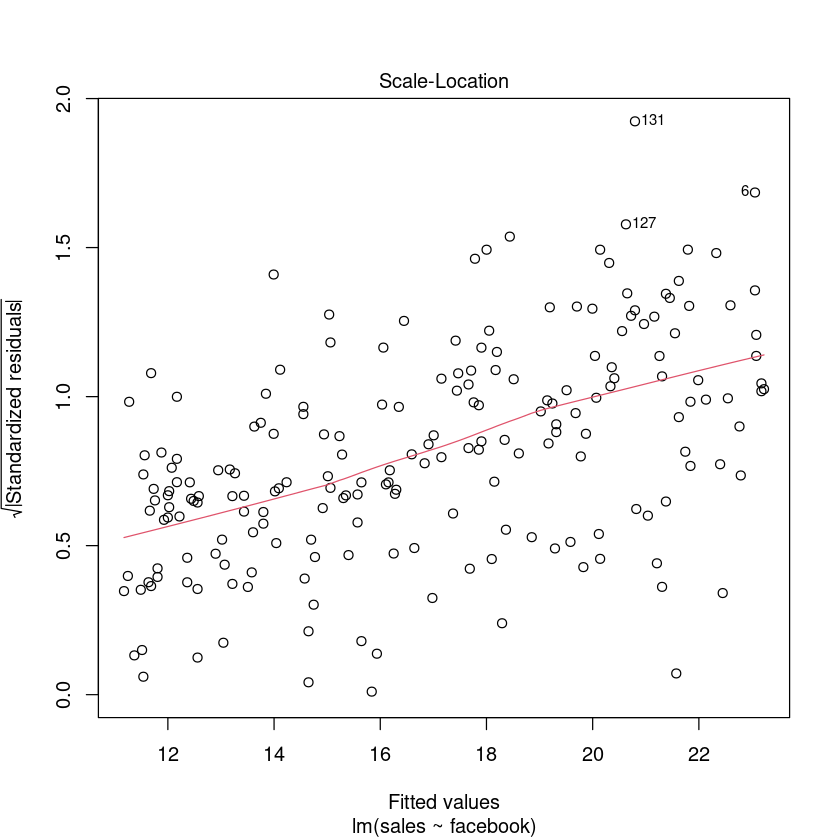

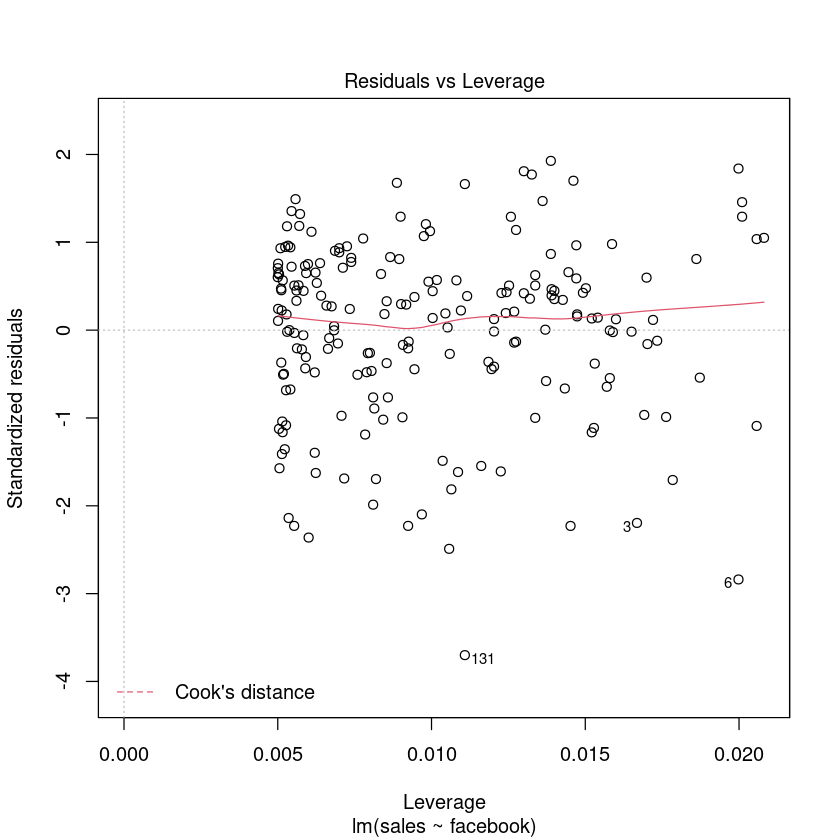

In [108]:
data("marketing", package = "datarium")
fit <- lm(sales ~ facebook, data = marketing)
plot(fit)

In [107]:
library(gvlma)

In [110]:
summary(gvlma(x=fit))


Call:
lm(formula = sales ~ facebook, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8766  -2.5589   0.9248   3.3330   9.8173 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.17397    0.67548  16.542   <2e-16 ***
facebook     0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.13 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                      Value   p-value                   Decision
Global Stat        22.06943 1.941e-04 Assumptions NOT satisfied!
Skewness           19.44101 1.038e-05 Assumptions NOT satisfied!
Kurtosis            2.46868 1.161e-01    Assumptions acceptable.
Link Function       0

p-value는 $\beta_0, \beta_1$ 모두  <2e-16으로 $H_0$을 채택하여 $\beta_0=0$이라는 결론이 나옴

$\therefore$ facebook 광고 늘리면 Sales 증가하겠군! 영향 끼치네!

하지만 위 그림에서 정규성도 의심되고 등분산성도 의심되었잖아? $\rightarrow$ 믿기 어려워

자유도가 198인 것을 보아 n=200 $\rightarrow$ 중심극한정리로 인해 정규성을 만족한다고 할 수 있다. 등분산성 위배는 아직 문제

Skewness(3차 적률) 불만족, Kurtosis(4차 적률) 만족 $\rightarrow$ 3차 적률로 보아 정규분포 벗어난다 말할까..!?

Heteroscedasticity(등분산성) 만족? 그림만 보기로는 아닌 것 같던데!

In [41]:
shapiro.test(fit$residuals)


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.96072, p-value = 2.367e-05


$H_0$ : 정규분포이다.
- p-value = 2.367e-05로, 정규성이 깨진다는 것을 알 수 있다.
- 하지만 n이 크니까 정규성 만족한다 봐..

In [124]:
library(car)

$H_0$: 등분산, $H_1$: 이분산
- p-value = 8.6237e-12로 $H_1$ 채택하여 등분산이 아니라는 결론이 도출되었다.

In [125]:
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 46.61861, Df = 1, p = 8.6237e-12

p-value 못 믿겠다.. 정말 facebook이 영향을 미치는 것일까?

In [48]:
B=2000
set.seed(1)
n = length(marketing$sales)
Bm1=c()

for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=marketing$facebook[hi]
  hy=marketing$sales[hi]
  Bm1[i]=lm(hy~hx)$coefficients[2]
}

hb=fit$coefficients[2]

# Bootstrap C.I. (normal interval)
c(hb-qnorm(0.975)*sd(Bm1),hb+qnorm(0.975)*sd(Bm1))

facebook  facebook 
0.1601905 0.2448011

$\hat{\beta_1} \pm Z_{0.025} se(\hat{\beta_1})^*$
- 0을 포함하지 않는다.
- 즉, facebook이 유의미한 영향을 주고 있다는 결론이 나온다.

In [49]:
# Bootstrap C.I. (Pivotal interval)
c(2*hb-quantile(Bm1,probs=0.975),2*hb-quantile(Bm1,probs=0.025))

facebook  facebook 
0.1615734 0.2469393

normal이랑 pivotal은 믿을만한 방법

In [46]:
# Bootstrap C.I. (Percentile interval)
c(quantile(Bm1,probs=0.025),quantile(Bm1,probs=0.975))

2.5%     97.5% 
-4.903441  6.863361

percent 위 두 방법이랑 다르네?

In [47]:
# CI by theory
confint(fit) 

,2.5 %,97.5 %
(Intercept),9.8419062,12.5060253
facebook,0.1622443,0.2427472


신뢰도 조정 가능!(옵션)

pivotal 이랑 이론이랑 별 차이가 없네..

---

Youtube도 해보기

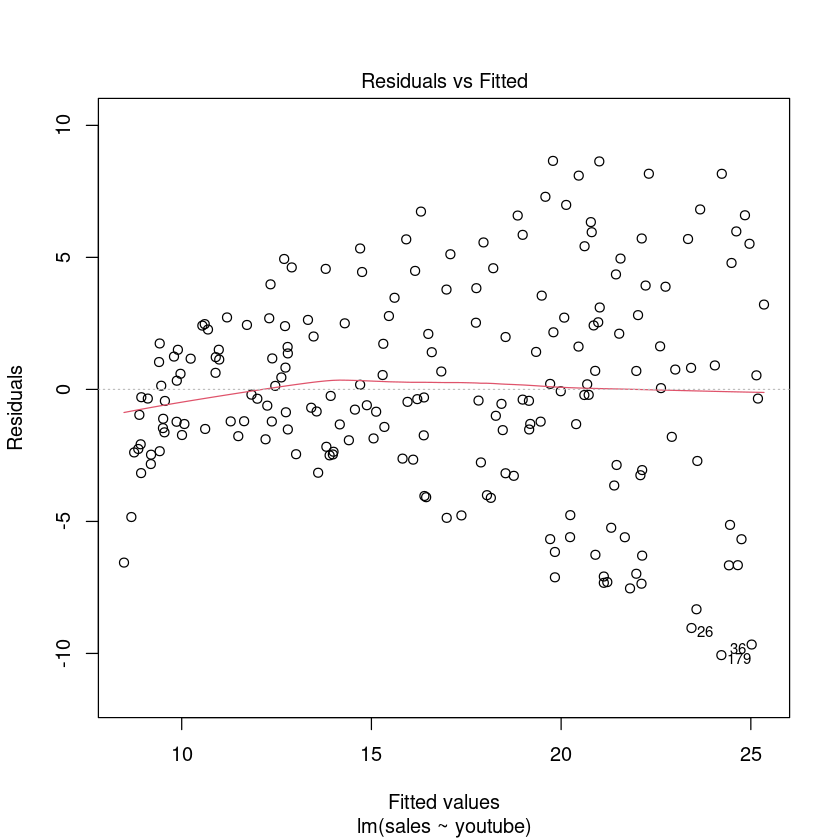

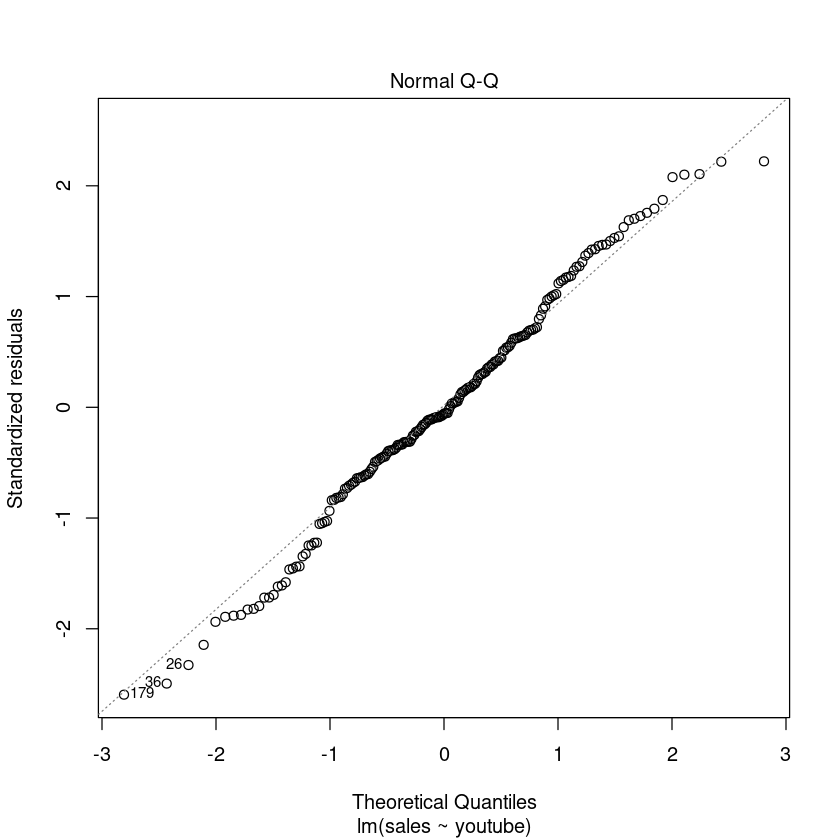

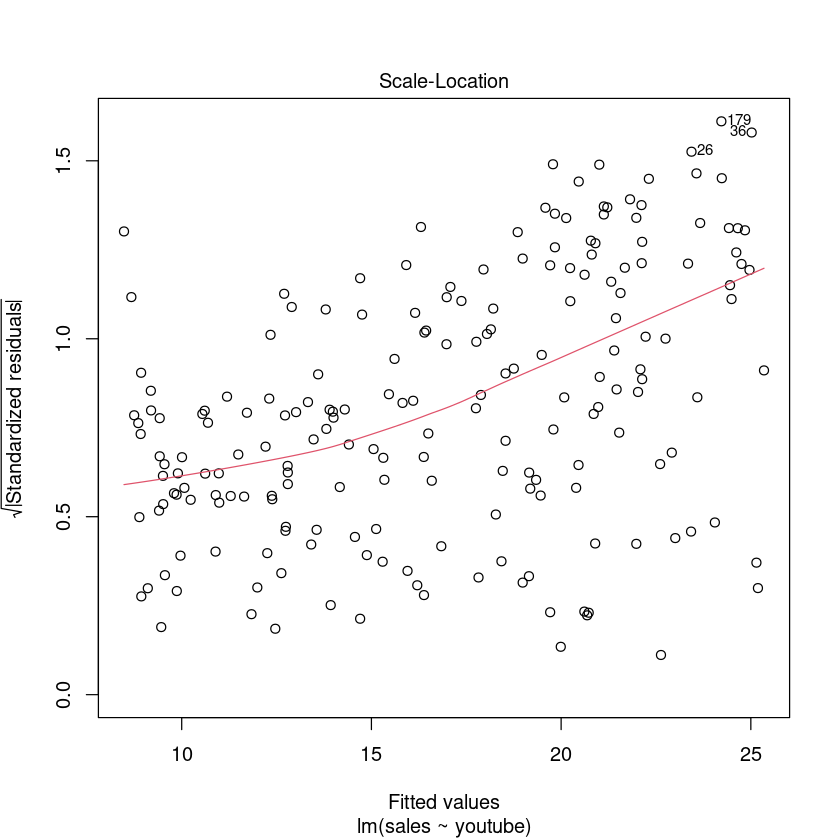

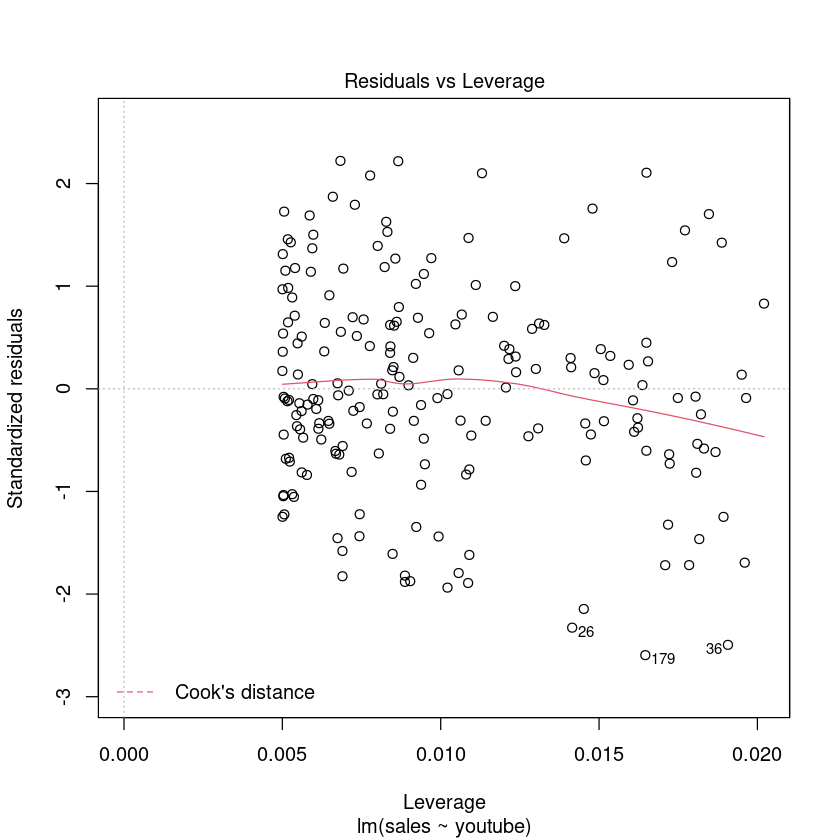

In [112]:
data("marketing", package = "datarium")
fit2 <- lm(sales ~ youtube, data = marketing)
plot(fit2)

In [113]:
summary(gvlma(x=fit2))


Call:
lm(formula = sales ~ youtube, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0632  -2.3454  -0.2295   2.4805   8.6548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.439112   0.549412   15.36   <2e-16 ***
youtube     0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit2) 

                    Value p-value                Decision
Global Stat        5.3240 0.25564 Assumptions acceptable.
Skewness           0.2619 0.60885 Assumptions acceptable.
Kurtosis           0.4070 0.52352 Assumptions acceptable.
Link Function      3.6906 0.05472 Assumptions ac

In [114]:
shapiro.test(fit2$residuals)


	Shapiro-Wilk normality test

data:  fit2$residuals
W = 0.99053, p-value = 0.2133


In [115]:
B=2000
set.seed(1)
n = length(marketing$sales)
Bm2=c()

for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=marketing$youtube[hi]
  hy=marketing$sales[hi]
  Bm2[i]=lm(hy~hx)$coefficients[2]
}

hb=fit2$coefficients[2]

# Bootstrap C.I. (normal interval)
c(hb-qnorm(0.975)*sd(Bm2),hb+qnorm(0.975)*sd(Bm2))

youtube    youtube 
0.04200188 0.05307141

$\hat{\beta_1} \pm Z_{0.025} se(\hat{\beta_1})^*$
- 0을 포함하지 않는다.
- 즉, youtube가 유의미한 영향을 주고 있다는 결론이 나온다.

In [116]:
# Bootstrap C.I. (Pivotal interval)
c(2*hb-quantile(Bm2,probs=0.975),2*hb-quantile(Bm2,probs=0.025))

youtube    youtube 
0.04198152 0.05298928

In [117]:
# Bootstrap C.I. (Percentile interval)
c(quantile(Bm2,probs=0.025),quantile(Bm2,probs=0.975))

2.5%      97.5% 
0.04208400 0.05309176

In [118]:
# CI by theory
confint(fit2) 

,2.5 %,97.5 %
(Intercept),7.35566312,9.52256140
youtube,0.04223072,0.05284256


---

결과는 비슷하지만 과정이 정당한지가 중요하다.$\rightarrow$ 절차적 정당성 확보
- 우리는 Bootstrap 이용해서 증명을 해낸 것이지.
- 위 그림에서 등분산/정규성 가정 위배? 애매했으니까.
- 오차항 정규성 만족하는 경우 거의 없어, 그 상태로 대부분 결론 내지.. 하지만 정당성 확보가 중요해!

회귀분석 교재보면
- 등분산 깨져?
    - 가중최소제곱 $\rightarrow$ 적용 어려워
    - 변수변환 $\rightarrow$ 전혀 다른 모형이 나올 수도 있고, 해석이 완전 달라져
- 정규성 깨져?
    - 변수변환 $\rightarrow$ 전혀 다른 모형이 나올 수도 있고, 해석이 완전 달라져
    - Box-cox $\rightarrow$ 전혀 다른 모형이 나올 수도 있고, 해석이 완전 달라져
    - 다른 분포 사용
- 독립성 깨져?
    - 일반화 최소제곱 $\rightarrow$ 적용 어려워

이상! Bootstrap이 좋은 이유였습니다~!

---

**Permutation vs Bootstrap**

Permutation test(순열 검정법)
- 검정할 때 쓰는, 검정을 위한 방법 
- C.I. 안 써!
- 범주형에 유용하다(그룹 간 차이)
- 복잡하면 쓰기 어렵다
- 전제: 귀무가설 하에서(null distribution) 표본 분포하는 것(?) $\rightarrow$ 찾아보기..
- 검정에 대한 기본적 원리를 알고 있다면...
- 표본$\hat{\theta}$의 분포만 안다면...

Bootstrap
- C.I. 구성, 분산 추정에 많이 사용
- 다소 modern한 방법

ref: https://angeloyeo.github.io/2021/10/28/permutation_test.html

🍫 아래는 검색 결과!

두 그릅 간에 통계적으로 유의한 차이가 있는지 확인하고 싶을때, 기존의 모수 통계를 적용하기 어려운 경우 비모수 검정법을 사용하는데 그 중 한 방법인 순열 검정법!

-  Null Hypothesis od exchangeability ; 순열 검정을 생각해내는 가장 핵심적인 귀무가설
    - $\star$ 만약 모수 집단에서 두 표본 그룹을 뽑았을때, 두 표본 그룹이 동일한 모집단에서 추출되었기 때문에 두 그룹 안에 있는 샘플들을 교환한 뒤 통계적으로 검증해도 여전히 두 그룹 간에는 차이가 없어야 한다.
    
- Ex) 두 그룹의 샘플 데이터가 주어져 있을때. 두 그룹의 평균 차이인 10.30이 과연 유의하게 크다고 말할 수 있는 값인가?
    - $\star$ 통계량은 어떤 것을 사용해도 무방, 이 예제에서는 평균 차이를 이용했다.
    - 1. 같은 샘플 데이터에서 셔플링을 통해 그룹을 다르게 선택하여 평균 차이를 구한다. -7.25가 나왔다,
    - 2. 같은 샘플 데이터에서 셔플링을 통해 그룹을 다르게 선택하여 평균 차이를 구한다. -9.05가 나왔다.
    - 3. 같은 샘플 데이터에서 셔플링을 통해 그룹을 다르게 선택하여 평균 차이를 구한다. 2.20이 나왔다.
    - 4. ... 반복한다.
    - 5. 100회정도 셔플링하여 구해서 히스토그램도 그려보기도 한다. 
    - 6. 분포 상에서 얼마나 순열(permutation) 상에서 높은 위치를 차지하고 있는지 확인하고자 p-value를 계산한다,
    - 7. p-value는 간단하게 (10.30보다 큰 셔플링 횟수)/(총 셔플링 횟수)로 구한다.
        - 간단하게 구해보면 [1,2,3,4,5,6,7,8,9,10,11,12,13] 이 있다면 10.30보다 3(11,12,13)개가 크기 때문에 3/13=0.2308

Bootstrap도 permutation test와 유사하게 추정량(estimator)에 대한 분포를 확인하게 해주는 비모수통계 기법이다.

차이
1. *Bootstrap은 estimator의 Confidence interval을 확인하기 위한 목적으로 주로 사용되는 반면 Permutation test는 null hypothesis를 test하기 위해 만들어졌다.*
2. *수행 과정 상에서는 Bootstrap은 중복을 허용하는 resampling을 수행하는 반면 permutation test는 중복없는 재배열을 수행한다는 차이점이 있다.*

---